# Facebook Insights

This is an assignment for PRO 316 - Social Media Data Analytics at Academy of Art University. A sample raw data of Facebook Insights are provided with questions to answered.

The dataset provided, which are excel files with multiple tabs, have been restructured, aggregated and reformatted to csv files for ease of use. For this homework, I will only be focusing on the Key Metrics provided on the data sets which are lifetime metrics

### Post Metric Definitions

* **Post Total Reach**: The total number of people your Page post was served to. (Unique Users)  
* **Post organic reach**: The number of people who saw your Page post in news feed or ticker, or on your Page's timeline. (Unique Users)  
* **Post Paid Reach**: The number of people your advertised Page post was served to. (Unique Users)  
* **Post Total Impressions**: The number of impressions of your Page post. (Total Count)  
* **Post Organic Impressions**: The number of impressions of your post in News Feed or ticker or on your Page's Timeline. (Total Count)  
* **Post Paid Impressions**: The number of impressions of your Page post in an Ad or Sponsored Story. (Total Count)  
* **Engaged Users**: The number of people who clicked anywhere in your posts. (Unique Users)  
* **Post Consumers**: The number of people who clicked anywhere in your post. (Unique Users)  
* **Post Consumptions**: The number of clicks anywhere in your post. (Total Count)  
* **Negative feedback**: The number of people who have given negative feedback to your post. (Unique Users)  
* **Negative Feedback from Users**: The number of times people have given negative feedback to your post. (Total Count)  
* **Post Impressions by people who have liked your Page**: The number of impressions of your Page post to people who have liked your Page. (Total Count)  
* **Post reach by people who like your Page**: The number of people who saw your Page post because they've liked your Page (Unique Users)  
* **Post Paid Impressions by people who have liked your Page**: The number of paid impressions of your Page post to people who have liked your Page. (Total Count)  
* **Paid reach of a post by people who like your Page**: The number of people who like your Page and who saw your Page post in an ad or sponsored story. (Unique Users)  
* **People who have liked your Page and engaged with your post**: The number of people who have liked your Page and clicked anywhere in your posts. (Unique Users)
* **Organic watches at 95%** : The number of times your video was watched at 95% of its length without any paid promotion, including watches that skipped to this point. (Total Count)  
* **Organic watches at 95%**: The number of times your video was watched at 95% of its length without any paid promotion, including watches that skipped to this point. (Unique Users)
* **Paid watches at 95%** : The number of times your video was watched at 95% of its length after paid promotion, including watches that skipped to this point. (Total Count)  
* **Paid watches at 95%**: The number of times your video was watched at 95% of its length after paid promotion, including watches that skipped to this point. (Unique Users)  
* **Organic Video Views**: Number of times your video was viewed for more than 3 seconds without any paid promotion. (Total Count)  
* **Organic Video Views**: Number of times your video was viewed for more than 3 seconds without any paid promotion. (Unique Users)
* **Paid Video Views**: Number of times your video was viewed more than 3 seconds after paid promotion. (Total Count)  
* **Paid Video Views**: Number of times your video was viewed more than 3 seconds after paid promotion. (Unique Users)  
* **Average time video viewed**: Average time video viewed (Total Count)
* **Video length**: Length of a video post (Total Count)

Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Post Metrics
For the following questions, I would be using the Post Key Metrics.

* What type of content (videos, photos, etc.) seems to be performing the best on Facebook? How much better than other types of content?
* What kind of content doesn't seem to perform well on Facebook? Back up your claim with numbers.

Loading, Cleaning and Exploring the data

In [35]:
post_data = pd.read_csv("data/POST Key Metrics.csv")
post_data.head()

,Type,Posted,Lifetime Post Total Reach,Lifetime Post organic reach,Lifetime Post Paid Reach,Lifetime Post Total Impressions,Lifetime Post Organic Impressions,Lifetime Post Paid Impressions,Lifetime Engaged Users,Lifetime Post Consumers,...,Lifetime Organic watches at 95%,Lifetime Organic watches at 95%.1,Lifetime Paid watches at 95%,Lifetime Paid watches at 95%.1,Lifetime Organic Video Views,Lifetime Organic Video Views.1,Lifetime Paid Video Views,Lifetime Paid Video Views.1,Lifetime Average time video viewed,Lifetime Video length
0,Link,2/28/17 2:30 PM,939.0,939,0.0,1646.0,1646,0.0,13.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,Photo,2/28/17 12:02 PM,854.0,854,0.0,1397.0,1397,0.0,41.0,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,Photo,2/27/17 9:17 AM,2063.0,2063,0.0,3140.0,3140,0.0,97.0,46.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,Status,2/23/17 11:12 AM,9.0,9,0.0,16.0,16,0.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,Status,2/23/17 11:07 AM,0.0,0,0.0,0.0,0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


Counting the number of posts per type

In [36]:
type_count = post_data.groupby('Type')['Posted'].nunique()

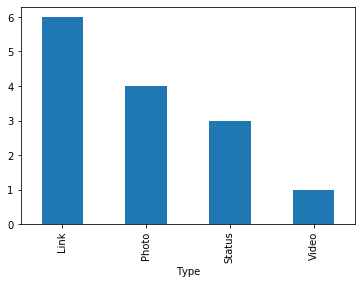

In [37]:
type_count.plot.bar()

From the chart, Link is the most used Post Type while there is only one Video post.

Since there is only one video post, I'll drop the columns that pertains to video metrics. These are also listed as NaN on the rows that are non-video posts.

In [38]:
post_data = post_data.drop(post_data.columns[18:], axis=1)
post_data.head()

,Type,Posted,Lifetime Post Total Reach,Lifetime Post organic reach,Lifetime Post Paid Reach,Lifetime Post Total Impressions,Lifetime Post Organic Impressions,Lifetime Post Paid Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Negative feedback,Lifetime Negative Feedback from Users,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime Post Paid Impressions by people who have liked your Page,Lifetime Paid reach of a post by people who like your Page,Lifetime People who have liked your Page and engaged with your post
0,Link,2/28/17 2:30 PM,939.0,939,0.0,1646.0,1646,0.0,13.0,8.0,8.0,0.0,0.0,1576.0,901.0,0.0,0.0,13.0
1,Photo,2/28/17 12:02 PM,854.0,854,0.0,1397.0,1397,0.0,41.0,23.0,34.0,0.0,0.0,1152.0,679.0,0.0,0.0,36.0
2,Photo,2/27/17 9:17 AM,2063.0,2063,0.0,3140.0,3140,0.0,97.0,46.0,54.0,1.0,1.0,2106.0,1358.0,0.0,0.0,74.0
3,Status,2/23/17 11:12 AM,9.0,9,0.0,16.0,16,0.0,2.0,2.0,2.0,0.0,0.0,16.0,9.0,0.0,0.0,2.0
4,Status,2/23/17 11:07 AM,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Lifetime Post Total Reach of Each Post')

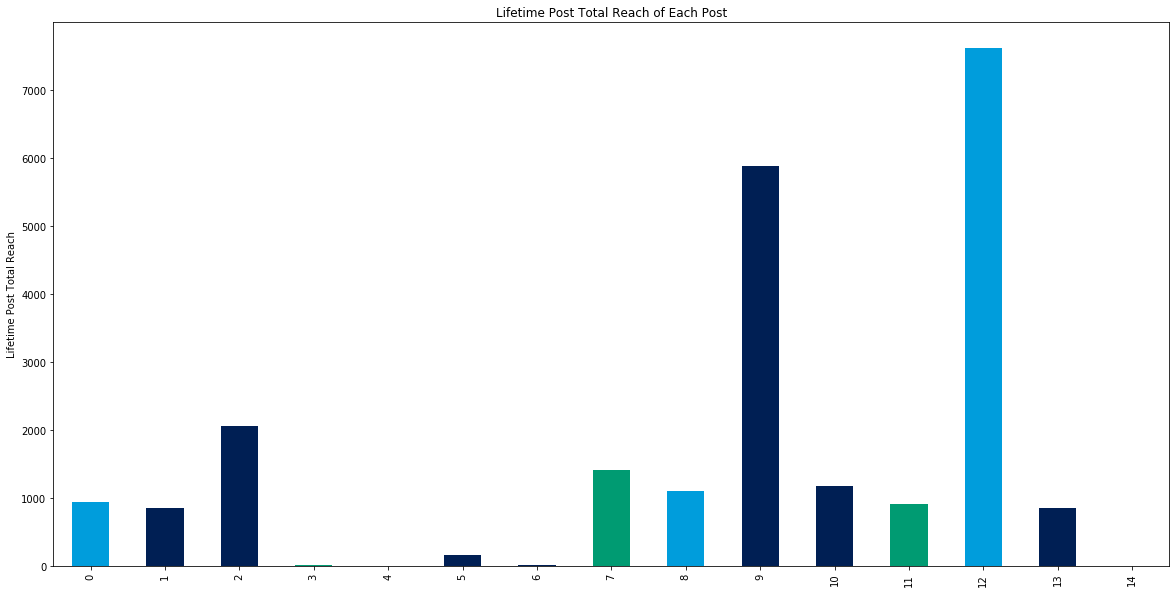

In [81]:
types = ['Link', 'Photo', 'Status', 'Video']
colors = ['#009ddc', '#001f54','#001f54', '#009b72']
typecolor = dict(zip(types, colors))

ax = post_data.plot(kind='bar', y='Lifetime Post Total Reach'
                    ,color = ['#009ddc', '#001f54','#001f54', '#009b72']
                    ,figsize=(20,10)
                    ,legend=False)

plt.ylabel("Lifetime Post Total Reach")
plt.title("Lifetime Post Total Reach of Each Post")

#### Taking the average Post Total Reach by Type

Taking the average of the metrics per type of post will eliminate the bias of simply taking the total of the numbers per type of post.

Text(0.5, 1.0, 'Average Lifetime Post Total Reach by Type')

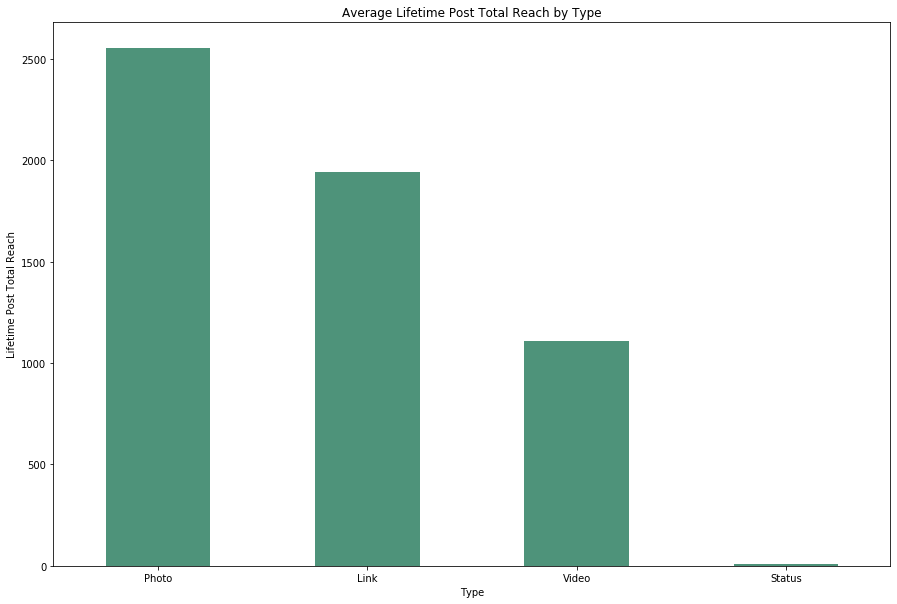

In [87]:
ave_totalreach = post_data.groupby(['Type'])['Lifetime Post Total Reach'].agg(['mean'])
ave_totalreach = ave_totalreach.sort_values(by='mean', ascending=False)
ave_totalreach.plot(kind='bar', figsize=(15,10), legend=False, color = '#4e937a', rot=0)

plt.ylabel('Lifetime Post Total Reach')
plt.title("Average Lifetime Post Total Reach by Type")

From this chart, we can see that Photos have the highest average reach despite Links the mostly shared type. Let's look at the averages of the other metrics

In [98]:
ave_impressions = post_data.groupby(['Type'])['Lifetime Post Total Impressions'].agg(['mean'])
ave_impressions = ave_impressions.sort_values(by='mean', ascending=False)

engaged_users = post_data.groupby(['Type'])['Lifetime Engaged Users'].agg(['mean'])
engaged_users = engaged_users.sort_values(by='mean', ascending=False)

reach_fan = post_data.groupby(['Type'])['Lifetime Post reach by people who like your Page'].agg(['mean'])
reach_fan = reach_fan.sort_values(by='mean', ascending=False)

fan_engage = post_data.groupby(['Type'])['Lifetime People who have liked your Page and engaged with your post'].agg(['mean'])
fan_engage = fan_engage.sort_values(by='mean', ascending=False)


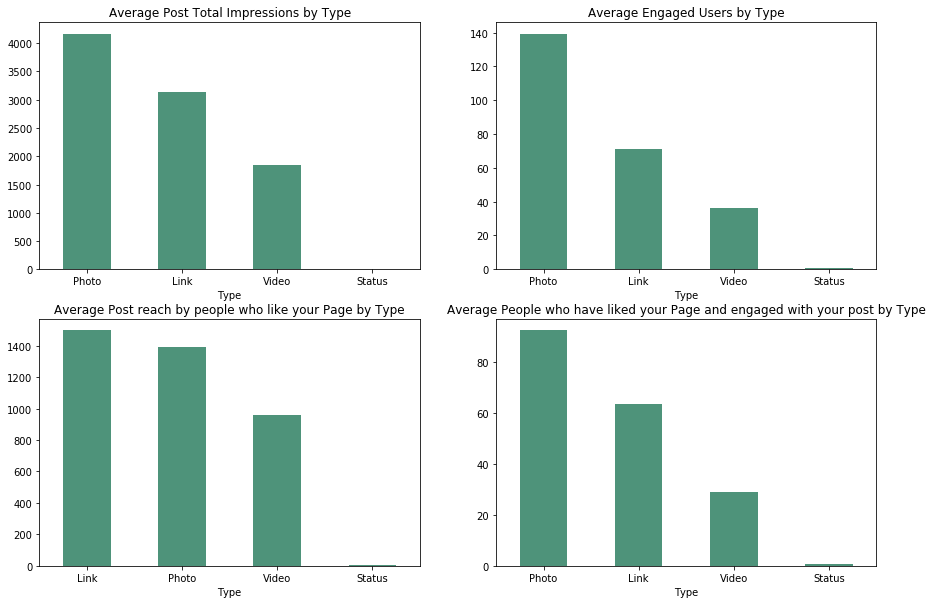

In [107]:
fig, axes = plt.subplots(nrows=2, ncols=2)

ave_impressions.plot(kind='bar', 
                     figsize=(15,10), 
                     legend=False, 
                     color = '#4e937a', 
                     rot=0, 
                     ax=axes[0,0], 
                     title='Average Post Total Impressions by Type')

engaged_users.plot(kind='bar', 
                   figsize=(15,10), 
                   legend=False, 
                   color = '#4e937a', 
                   rot=0, 
                   ax=axes[0,1], 
                   title='Average Engaged Users by Type')

reach_fan.plot(kind='bar', 
               figsize=(15,10), 
               legend=False, 
               color = '#4e937a', 
               rot=0, 
               ax=axes[1,0], 
               title='Average Post reach by people who like your Page by Type')

fan_engage.plot(kind='bar', 
                figsize=(15,10), 
                legend=False, 
                color = '#4e937a', 
                rot=0, 
                ax=axes[1,1], 
                title='Average People who have liked your Page and engaged with your post by Type')
